In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [44]:
#Load data file
file_to_load = "Data/chicago_data.csv"
chicago_data_df = pd.read_csv(file_to_load)
chicago_data_df.count()

date                                      236
cases_total                               237
deaths_total                              237
hospitalizations_total                    233
cases_age_0_17                            237
                                         ... 
combined_hospital_beds_in_use_covid_19    204
daily_update_pdf                          218
ventilator_surge_capacity                  54
icu_beds_surge_capacity_adult              54
icu_beds_surge_capacity_pediatric          54
Length: 90, dtype: int64

In [45]:
#Get rid of unknowns
chicago_data_df = chicago_data_df.drop(columns=['cases_age_unknown','cases_unknown_gender','hospitalizations_unknown_gender',\
                                          'hospitalizations_age_unknown','hospitalizations_age_unknown',\
                                          'cases_unknown_race_eth','hospitalizations_unknown_race_ethnicity',\
                                          'deaths_unknown_gender','hospitalizations_unknown_race_ethnicity',\
                                          'cases_unknown_race_eth','deaths_unknown_gender','deaths_unknown_age',\
                                          'deaths_unknown_age','cases_unknown_race_eth','deaths_unknown_race_eth'])

In [46]:
#Convert date column from a string to a datetime datatype
chicago_data_df["date"] = pd.to_datetime(chicago_data_df["date"])

#Use the date column as the index
chicago_data_df = chicago_data_df.set_index("date")
chicago_data_df

,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,acute_non_icu_beds_in_use_covid_19,acute_non_icu_beds_in_use_covid_19_patients,acute_non_icu_beds_in_use_covid_19_pui,acute_non_icu_beds_in_use_non_covid_19,acute_non_icu_beds_available_total,combined_hospital_beds_in_use_covid_19,daily_update_pdf,ventilator_surge_capacity,icu_beds_surge_capacity_adult,icu_beds_surge_capacity_pediatric
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,282,20,130.0,4,29,48,54,50,50,30,...,NaN,NaN,NaN,NaN,1638.0,NaN,{'url': 'https://www.chicago.gov/content/dam/c...,196.0,218.0,8.0
2020-03-01,0,0,2.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,0,0,2.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0,0,3.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0,0,4.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-04,319,14,35.0,27,92,63,54,40,25,10,...,721.0,437.0,284.0,4593.0,2450.0,1033.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN
2020-07-15,267,7,24.0,30,83,51,33,34,18,12,...,423.0,184.0,239.0,5193.0,2421.0,521.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN
2020-07-13,335,3,35.0,36,98,68,45,35,31,7,...,361.0,161.0,200.0,5090.0,2592.0,467.0,{'url': 'https://www.chicago.gov/content/dam/c...,NaN,NaN,NaN


In [47]:
#gather data of number of deaths by gender
deaths_by_gender = ([chicago_data_df["deaths_male"].sum(), chicago_data_df["deaths_female"].sum()])
          
x_axis = np.arange(len(deaths_by_gender))

(0.0, 2276.0)

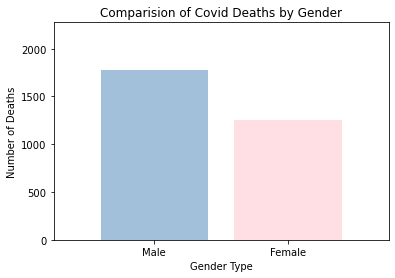

In [48]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
xlabels = ["Male", "Female"]
plt.bar(xlabels, deaths_by_gender, color= ['steelblue', 'Pink'], alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Comparision of Covid Deaths by Gender")
plt.xlabel("Gender Type")
plt.ylabel("Number of Deaths")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(deaths_by_gender)+500)

In [49]:
# Generate a pie plot showing the distribution of Covid deaths by gender
deaths_df = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Deaths": [chicago_data_df["deaths_male"].sum(), chicago_data_df["deaths_female"].sum()]             
})

deaths_df = deaths_df[deaths_df.Deaths != 0]
# change the index to values in Gender column, the DF index will be used for the X label
deaths_df = deaths_df.set_index("Gender") 

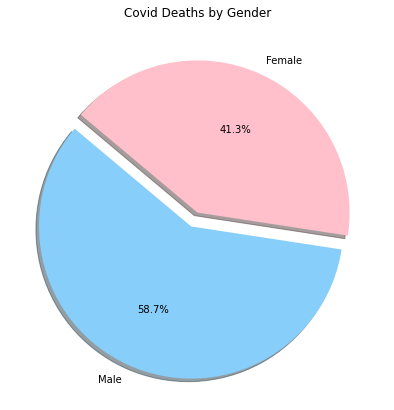

In [50]:
# Generate a pie plot showing the distribution of Covid deaths by gender
plt.figure(figsize=(15,15))
ax = plt.subplot(121, aspect="equal")

explode = [0.1, 0] # for plotting two data points

# The colors of each section of the pie chart
colors = ["lightskyblue", "pink"]
deaths_df.plot(kind="pie", y = "Deaths", title="Covid Deaths by Gender", ax=ax,\
            autopct='%1.1f%%', legend = False, fontsize=10, colors=colors,\
            startangle=140, shadow = True, explode = explode)
#null out the y label
plt.ylabel("")

fig = ax.get_figure()
fig.savefig('Output/Covid Deaths by Gender.png')

In [51]:
#gather data of number of deaths by race
deaths_by_race = ([chicago_data_df["deaths_black_non_latinx"].sum(), chicago_data_df["deaths_latinx"].sum(),\
                   chicago_data_df["deaths_white_non_latinx"].sum(), chicago_data_df["deaths_asian_non_latinx"].sum(),\
                   chicago_data_df["deaths_other_non_latinx"].sum()])

print(deaths_by_race)
x_axis = np.arange(len(deaths_by_race))

[1279, 999, 585, 128, 24]


(0.0, 1479.0)

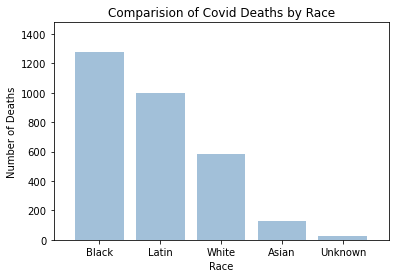

In [52]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
xlabels = ["Black", "Latin", "White", "Asian", "Unknown"]
plt.bar(xlabels, deaths_by_race, color='steelblue', alpha=0.5, align="center")
# Give our chart some labels and a tile
plt.title("Comparision of Covid Deaths by Race")
plt.xlabel("Race")
plt.ylabel("Number of Deaths")
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(deaths_by_race)+200)
#plt.grid()



In [53]:
deaths_by_race_df = pd.DataFrame({
    "Race": ["Black", "White", "Latin", "Asian", "Unknown"],
    "Deaths": [chicago_data_df["deaths_black_non_latinx"].sum(), chicago_data_df["deaths_white_non_latinx"].sum(),\
              chicago_data_df["deaths_latinx"].sum(), chicago_data_df["deaths_asian_non_latinx"].sum(),\
               chicago_data_df["deaths_other_non_latinx"].sum()]
})

deaths_by_race_df.sort_values(by=["Deaths"], inplace=True, ascending=False)
# change the index to values in Race column, the DF index will be used for the X label
deaths_by_race_df = deaths_by_race_df.set_index("Race")
deaths_by_race_df

,Deaths
Race,
Black,1279
Latin,999
White,585
Asian,128
Unknown,24


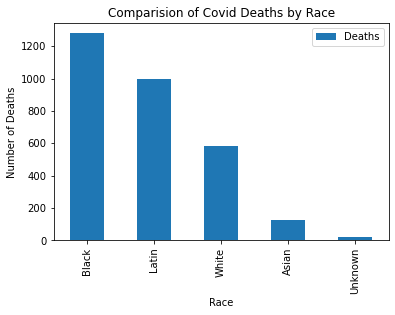

In [54]:
# Generate a bar plot showing the distribution of Covid deaths by gender
ax = deaths_by_race_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths by Race")
plt.xlabel("Race")
plt.ylabel("Number of Deaths")

fig = ax.get_figure()
fig.savefig('Output/Comparision of Covid Deaths by Race.png')

In [55]:
#Comparison of deaths by age group
deaths_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Deaths": [chicago_data_df["deaths_0_17_yrs"].sum(), chicago_data_df["deaths_18_29_yrs"].sum(),\
        chicago_data_df["deaths_30_39_yrs"].sum(), chicago_data_df["deaths_40_49_yrs"].sum(),\
        chicago_data_df["deaths_50_59_yrs"].sum(), chicago_data_df["deaths_60_69_yrs"].sum(),\
        chicago_data_df["deaths_70_79_yrs"].sum(), chicago_data_df["deaths_80_yrs"].sum()]
})
deaths_by_age_df = deaths_by_age_df.set_index("Age Group")

deaths_by_age_df

,Deaths
Age Group,
0_17_yrs,2
18_29_yrs,23
30_39_yrs,76
40_49_yrs,170
50_59_yrs,340
60_69_yrs,661
70_79_yrs,749
80_yrs,1005


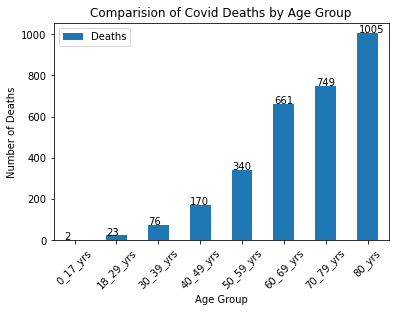

In [56]:
# Generate a bar plot showing the distribution of Covid deaths by age group
ax = deaths_by_age_df.plot(kind="bar", rot='45') 
plt.title("Comparision of Covid Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
fig = ax.get_figure()
fig.savefig('Output/Comparision of Covid Deaths by Age Group.png')

Text(0, 0.5, 'Number of Deaths')

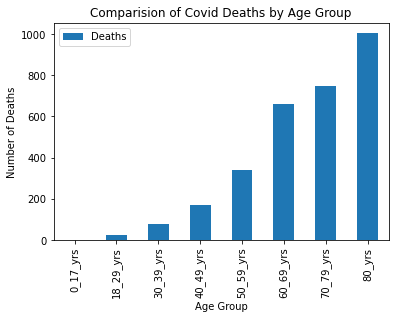

In [57]:
# Generate a bar plot showing the distribution of Covid deaths by age group
deaths_by_age_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")

In [58]:
#create hospitalization df
hospitalizations_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Hospitalizations": [chicago_data_df["hospitalizations_age_0_17"].sum(), chicago_data_df["hospitalizations_age_18_29"].sum(),\
        chicago_data_df["hospitalizations_age_30_39"].sum(), chicago_data_df["hospitalizations_age_40_49"].sum(),\
        chicago_data_df["hospitalizations_age_50_59"].sum(), chicago_data_df["hospitalizations_age_60_69"].sum(),\
        chicago_data_df["hospitalizations_age_70_79"].sum(), chicago_data_df["hospitalizations_age_80_"].sum()]
})
hospitalizations_by_age_df = hospitalizations_by_age_df.set_index("Age Group")

In [59]:
#create hospitalization df
cases_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "COVID Cases": [chicago_data_df["cases_age_0_17"].sum(), chicago_data_df["cases_age_18_29"].sum(),\
        chicago_data_df["cases_age_30_39"].sum(), chicago_data_df["cases_age_40_49"].sum(),\
        chicago_data_df["cases_age_50_59"].sum(), chicago_data_df["cases_age_60_69"].sum(),\
        chicago_data_df["cases_age_70_79"].sum(), chicago_data_df["cases_age_80_"].sum()]
})
cases_by_age_df = cases_by_age_df.set_index("Age Group")

In [60]:
#Create a DF that is composed of deaths and hospitalizations by age group
deaths_vs_hospital_df = pd.concat([cases_by_age_df, hospitalizations_by_age_df, deaths_by_age_df], axis=1)

deaths_vs_hospital_df

,COVID Cases,Hospitalizations,Deaths
Age Group,,,
0_17_yrs,7090,217.0,2
18_29_yrs,21156,992.0,23
30_39_yrs,17432,1229.0,76
40_49_yrs,15391,1759.0,170
50_59_yrs,13695,2521.0,340
60_69_yrs,9270,2798.0,661
70_79_yrs,4844,2291.0,749
80_yrs,3440,1856.0,1005


Text(0, 0.5, 'Number of Deaths')

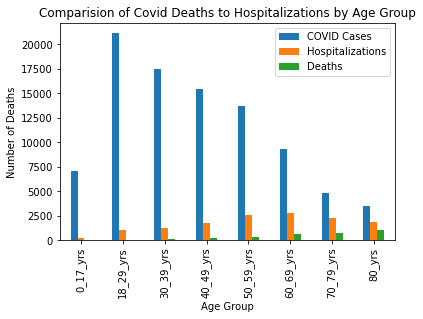

In [61]:
#plot bar that shows comparision of deaths to hospitalizations by age group
#plt.style.use('seaborn-colorblind')
deaths_vs_hospital_df.plot(kind="bar") 

plt.title("Comparision of Covid Deaths to Hospitalizations by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")

In [62]:
hospitalizations_by_age_df = pd.DataFrame({
    "Age Group": ["0_17_yrs", "18_29_yrs", "30_39_yrs", "40_49_yrs", "50_59_yrs", "60_69_yrs", "70_79_yrs", "80_yrs"],
    "Hospitalizations": [chicago_data_df["hospitalizations_age_0_17"].sum(), chicago_data_df["hospitalizations_age_18_29"].sum(),\
        chicago_data_df["hospitalizations_age_30_39"].sum(), chicago_data_df["hospitalizations_age_40_49"].sum(),\
        chicago_data_df["hospitalizations_age_50_59"].sum(), chicago_data_df["hospitalizations_age_60_69"].sum(),\
        chicago_data_df["hospitalizations_age_70_79"].sum(), chicago_data_df["hospitalizations_age_80_"].sum()]
})

In [63]:
#Group the data by month or week ('W' or 'M') and take the sum for each group (i.e. each month)
cases_df = chicago_data_df.resample("W").sum()

In [64]:
monthly_cases_df = cases_df[['cases_total']]

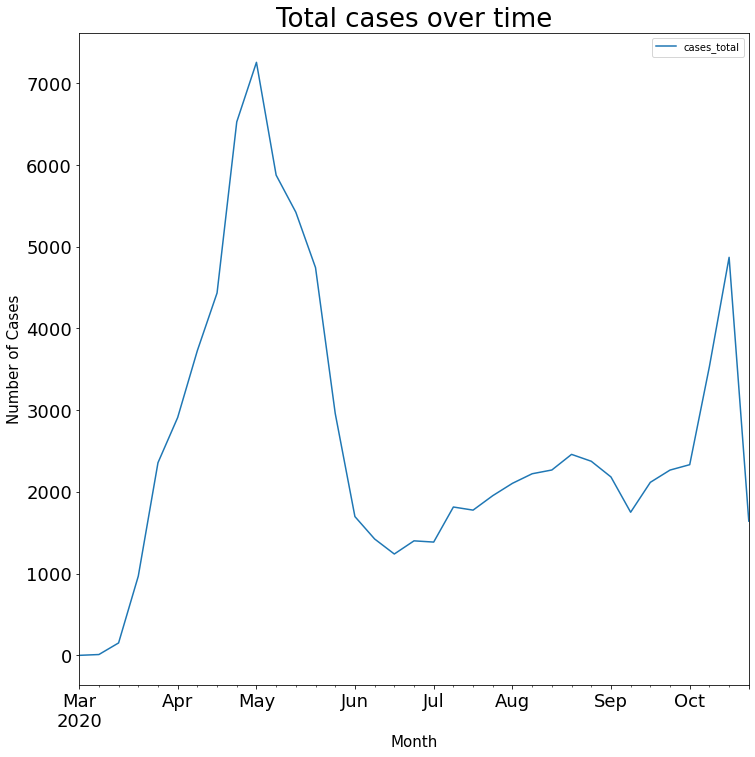

In [65]:
#plot cases over time
ax = monthly_cases_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Total cases over time", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
fig = ax.get_figure()
fig.savefig('Output/Total Cases.png')

What is the trend of "cases" by month?

In [66]:
all_age_groups_df = cases_df[["cases_age_0_17", "cases_age_18_29", "cases_age_30_39", "cases_age_40_49",\
                 "cases_age_50_59", "cases_age_60_69", "cases_age_70_79", "cases_age_80_"]]

#Clean up column header names for better display
all_age_groups_df = all_age_groups_df.rename(columns = {"cases_age_0_17":"Age 0-17", "cases_age_18_29":"Age 18-29",\
                                    "cases_age_30_39":"Age 30-39", "cases_age_40_49":"Age 40-49",\
                                    "cases_age_50_59":"Age 50-59", "cases_age_60_69":"Age 60-69",\
                                    "cases_age_70_79":"Age 70-79", "cases_age_80_":"Age 80-"
                                   })

In [67]:
count_age_groups_df = all_age_groups_df.sum()
#count_age_groups_df.sort(["cases_total"])
count_age_groups_df

Age 0-17      7086
Age 18-29    21123
Age 30-39    17400
Age 40-49    15362
Age 50-59    13670
Age 60-69     9250
Age 70-79     4834
Age 80-       3436
dtype: int64

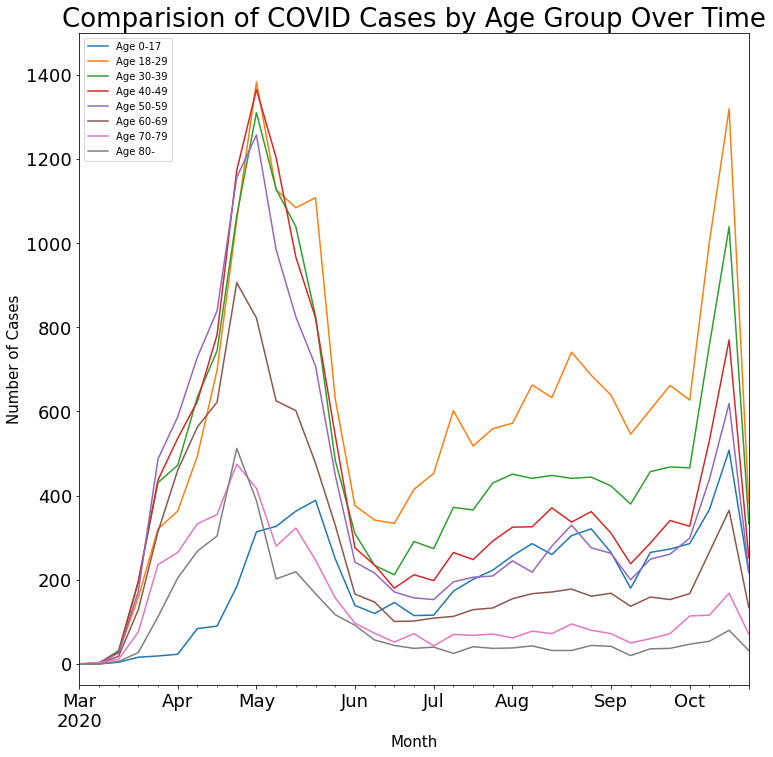

In [68]:
ax = all_age_groups_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Comparision of COVID Cases by Age Group Over Time", fontsize=26)
plt.xlabel("Month",fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)

fig = ax.get_figure()
fig.savefig('Output/Comparison of COVID Cases by Age Group.png')

Cases by all age groups over time.

In [69]:
ages_18_39_df = cases_df[["cases_age_18_29", "cases_age_30_39"]]
#Clean up column header names for better display
ages_18_39_df = ages_18_39_df.rename(columns = {"cases_age_18_29":"Age 18-29",\
                                    "cases_age_30_39":"Age 30-39"})

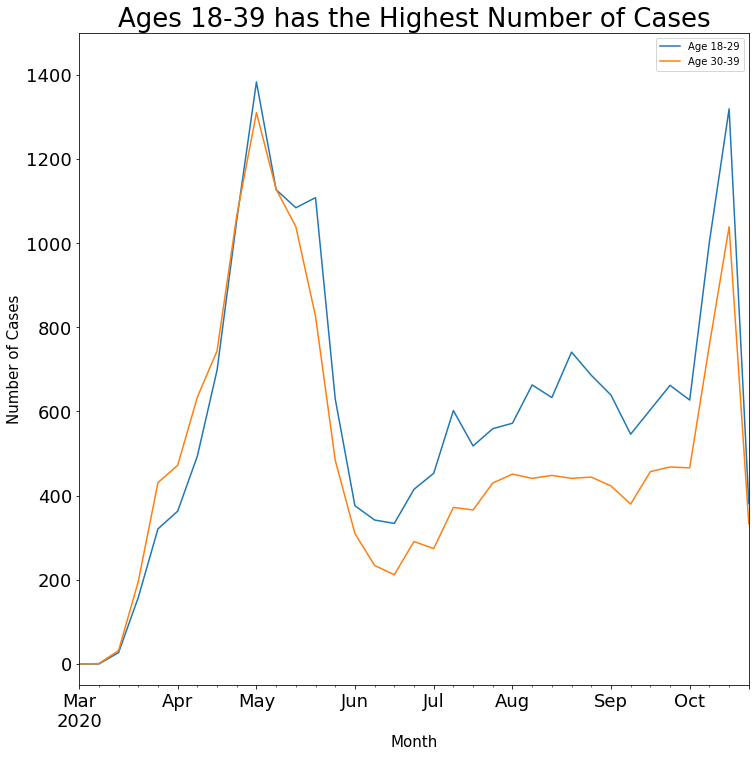

In [70]:
ax = ages_18_39_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 18-39 has the Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)
fig = ax.get_figure()
fig.savefig('Output/Ages 18-39 has the Highest Number of Cases.png')

What Age Group(s) has the highest number of cases?

In [71]:
ages_40_59_df = cases_df[["cases_age_40_49","cases_age_50_59"]]

#Clean up column header names for better display
ages_40_59_df = ages_40_59_df.rename(columns = {"cases_age_40_49":"Age 40-49",\
                                    "cases_age_50_59":"Age 50-59"})

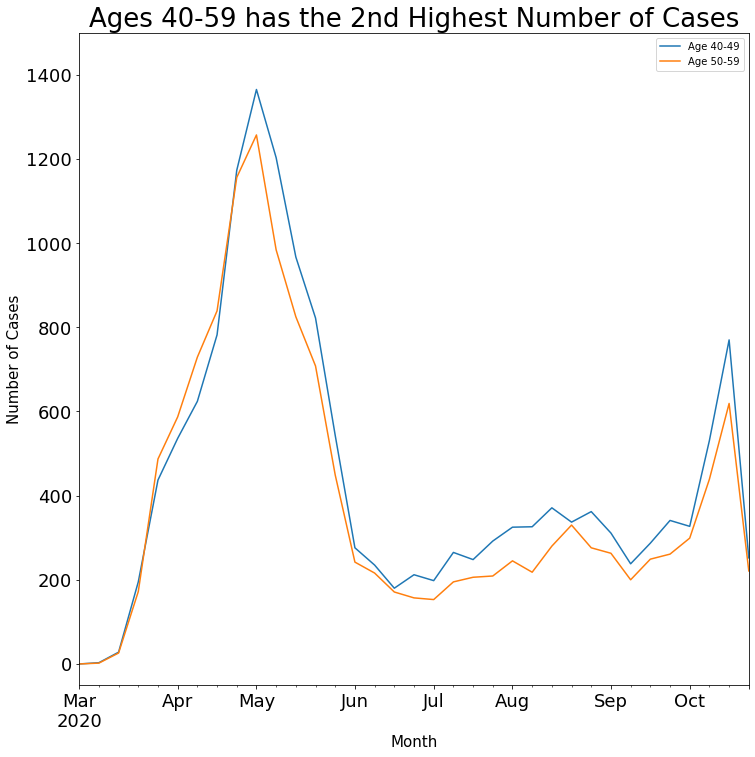

In [72]:
ax = ages_40_59_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 40-59 has the 2nd Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases",fontsize=15)

fig = ax.get_figure()
fig.savefig('Output/Ages 40-59 has the 2nd Highest Number of Cases.png')


What Age Group(s) has the 2nd highest number of cases?

In [73]:
ages_0_17_60_69_df = cases_df[["cases_age_0_17", "cases_age_60_69"]]

#Clean up column header names for better display
ages_0_17_60_69_df = ages_0_17_60_69_df.rename(columns = {"cases_age_0_17":"Age 0-17", "cases_age_60_69":"Age 60-69"})

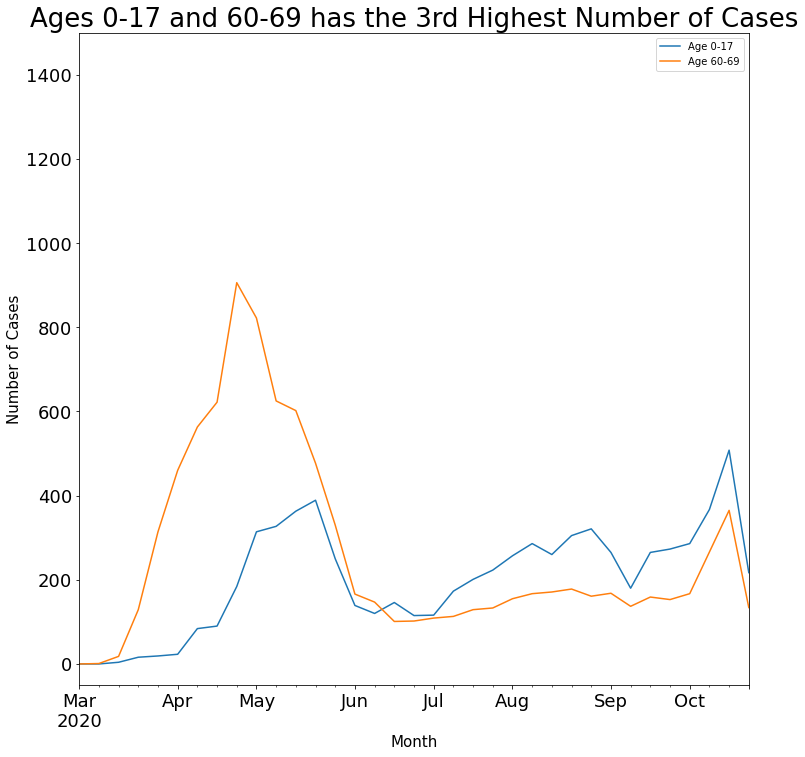

In [74]:
ax = ages_0_17_60_69_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 0-17 and 60-69 has the 3rd Highest Number of Cases", fontsize=26)
plt.xlabel("Month", fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)
fig = ax.get_figure()
fig.savefig('Output/Ages 0-17 and 60-69 has the 3rd Highest Number of Cases.png')

What Age Group(s) has the 3rd highest number of cases?

In [75]:
ages_70_higher_df = cases_df[["cases_age_70_79", "cases_age_80_"]]

#Clean up column header names for better display
ages_70_higher_df = ages_70_higher_df.rename(columns = {"cases_age_70_79":"Age 70-79", "cases_age_80_":"Age 80-"})

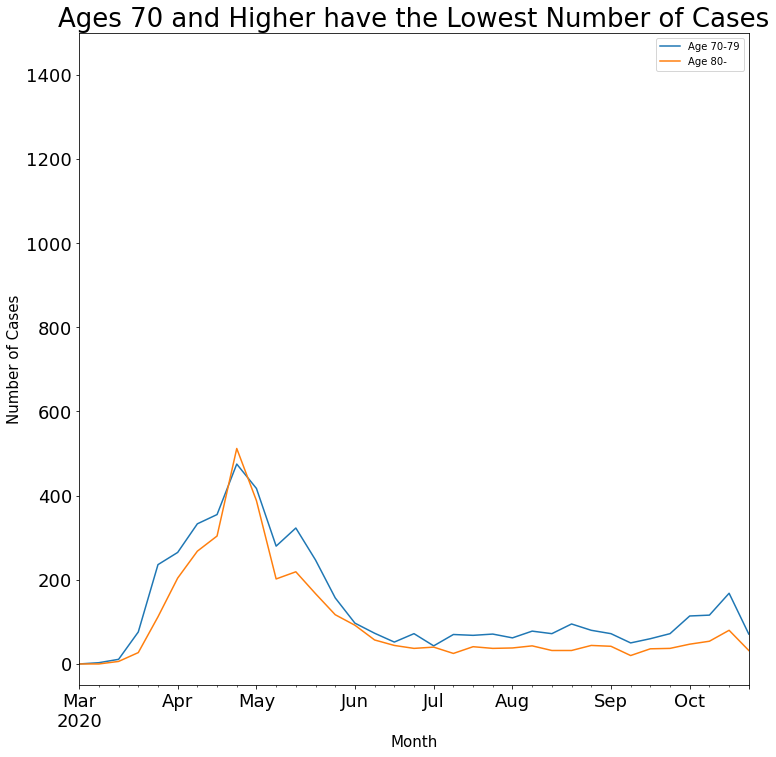

In [76]:
ax = ages_70_higher_df.plot(kind="line", figsize=(12,12), fontsize=(18))
plt.title("Ages 70 and Higher have the Lowest Number of Cases", fontsize=26)
plt.xlabel("Month",fontsize=15)
plt.ylim((-50,1500))
plt.ylabel("Number of Cases", fontsize=15)
fig = ax.get_figure()
fig.savefig('Ages 70 and Higher have the Lowest Number of Cases.png')

In [77]:
filtered_columns = ['cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39',
       'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69',
       'cases_age_70_79', 'cases_age_80_', 'deaths_18_29_yrs', 'deaths_30_39_yrs', 'deaths_40_49_yrs',
       'deaths_50_59_yrs', 'deaths_60_69_yrs', 'deaths_70_79_yrs',
       'deaths_80_yrs','hospitalizations_age_0_17', 'hospitalizations_age_18_29',
       'hospitalizations_age_30_39', 'hospitalizations_age_40_49',
       'hospitalizations_age_50_59', 'hospitalizations_age_60_69',
       'hospitalizations_age_70_79', 'hospitalizations_age_80_']

In [78]:
pd.DataFrame.melt

<function pandas.core.frame.DataFrame.melt(self, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> 'DataFrame'>

In [79]:
cdh = chicago_data_df[filtered_columns]
cdh.head(1)

,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,cases_age_80_,deaths_18_29_yrs,deaths_30_39_yrs,...,deaths_70_79_yrs,deaths_80_yrs,hospitalizations_age_0_17,hospitalizations_age_18_29,hospitalizations_age_30_39,hospitalizations_age_40_49,hospitalizations_age_50_59,hospitalizations_age_60_69,hospitalizations_age_70_79,hospitalizations_age_80_
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,4,29,48,54,50,50,30,17,1,0,...,6,4,0.0,5.0,12.0,25.0,23.0,27.0,24.0,14.0


In [80]:
cdh.columns

Index(['cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39',
       'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69',
       'cases_age_70_79', 'cases_age_80_', 'deaths_18_29_yrs',
       'deaths_30_39_yrs', 'deaths_40_49_yrs', 'deaths_50_59_yrs',
       'deaths_60_69_yrs', 'deaths_70_79_yrs', 'deaths_80_yrs',
       'hospitalizations_age_0_17', 'hospitalizations_age_18_29',
       'hospitalizations_age_30_39', 'hospitalizations_age_40_49',
       'hospitalizations_age_50_59', 'hospitalizations_age_60_69',
       'hospitalizations_age_70_79', 'hospitalizations_age_80_'],
      dtype='object')

In [81]:
cdh.head()

,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,cases_age_80_,deaths_18_29_yrs,deaths_30_39_yrs,...,deaths_70_79_yrs,deaths_80_yrs,hospitalizations_age_0_17,hospitalizations_age_18_29,hospitalizations_age_30_39,hospitalizations_age_40_49,hospitalizations_age_50_59,hospitalizations_age_60_69,hospitalizations_age_70_79,hospitalizations_age_80_
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,4,29,48,54,50,50,30,17,1,0,...,6,4,0.0,5.0,12.0,25.0,23.0,27.0,24.0,14.0
2020-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2020-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0


In [82]:
#reset the index so that we can pul the date data
cdh = cdh.reset_index()

In [83]:
#worked with my tutor to try to melt the data.  I wanted to have all the age groups and then work with the data in that fashion
cdh_melt = cdh.melt(id_vars='date',value_vars=['cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39',
       'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69',
       'cases_age_70_79', 'cases_age_80_', 'deaths_18_29_yrs',
       'deaths_30_39_yrs', 'deaths_40_49_yrs', 'deaths_50_59_yrs',
       'deaths_60_69_yrs', 'deaths_70_79_yrs', 'deaths_80_yrs',
       'hospitalizations_age_0_17', 'hospitalizations_age_18_29',
       'hospitalizations_age_30_39', 'hospitalizations_age_40_49',
       'hospitalizations_age_50_59', 'hospitalizations_age_60_69',
       'hospitalizations_age_70_79', 'hospitalizations_age_80_'], var_name='type')

In [84]:
cdh_melt = cdh_melt.set_index('date').sort_index()

In [85]:
cdh_melt.head()

,type,value
date,,
2020-03-01,deaths_80_yrs,0.0
2020-03-01,hospitalizations_age_0_17,0.0
2020-03-01,cases_age_30_39,0.0
2020-03-01,deaths_60_69_yrs,0.0
2020-03-01,hospitalizations_age_50_59,0.0
